In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow --quiet

In [ ]:
# Import libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Import libraries for working with dates and times
import datetime as dt

# Import TensorFlow and Keras libraries for building and training neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, SimpleRNN, Reshape, Flatten
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2

# Import scikit-learn library for various metrics and preprocessing tools
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Import matplotlib library for creating plots and charts
import matplotlib.pyplot as plt

# Magic command to display plots inline in the Jupyter Notebook
%matplotlib inline

In [ ]:
# Calculate the accuracy of each model
def evaluateModel(test,pred,val,pred_val):
  print('** Testing **')
  test_mae = mean_absolute_error(test, pred)
  print('MAE: ', test_mae)

  test_ape = np.abs((test - pred) / test)
  test_mape = np.mean(test_ape) * 100
  print('MAPE: ', test_mape)

  test_mse = mean_squared_error(test, pred)
  test_rmse = np.sqrt(test_mse)
  print('RMSE: ', test_rmse)

  print('\n** Validate **')
  val_mae = mean_absolute_error(val, pred_val)
  print('MAE: ', val_mae)

  val_ape = np.abs((val - pred_val) / val)
  val_mape = np.mean(val_ape) * 100
  print('MAPE: ', val_mape)

  val_mse = mean_squared_error(val, pred_val)
  val_rmse = np.sqrt(val_mse)
  print('RMSE: ', val_rmse)

In [ ]:
# Read in the Gold dataset from a CSV file
df=pd.read_csv("/content/drive/MyDrive/PTDLKD/Data/Gold_Data.csv")
df=df.set_index(pd.DatetimeIndex(df['Date'].values))


# Preprocessing Data

---

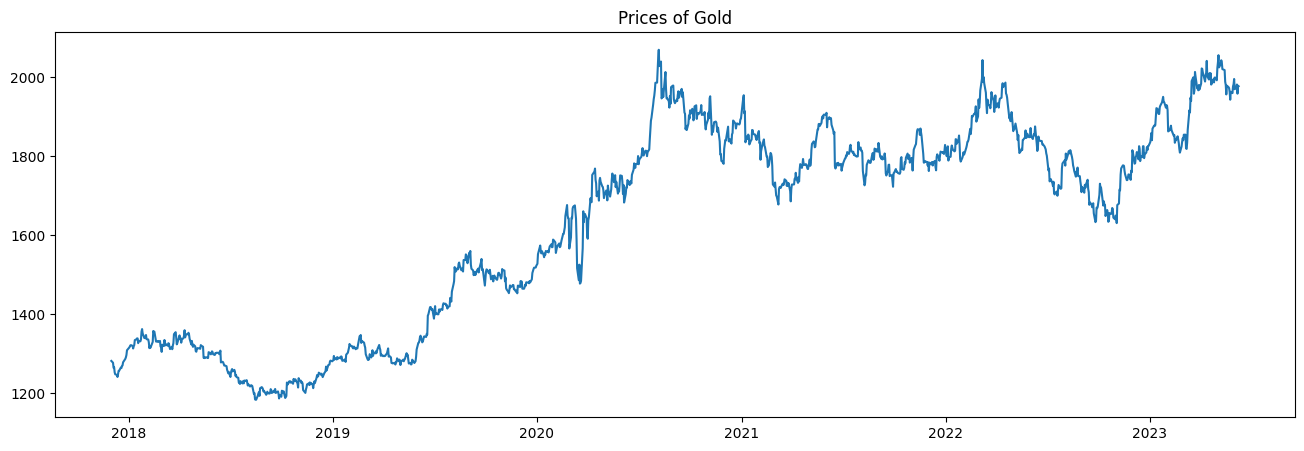

In [ ]:
# Format column Date
df.index = pd.to_datetime(df.index,format='%m/%d/%Y')

# Format column Price to float
df['Price'] = df.Price.str.replace(',','').astype(float)

# Flip the column
df = df.iloc[::-1]

# Create new Dataframe
df1 = pd.DataFrame(df, columns=['Date', 'Price'])
df1.drop('Date', axis = 1, inplace = True)

# Plot the 'price' column of the 'df' DataFrame
plt.figure(figsize=(16,5))
plt.plot(df1['Price'])
plt.title('Prices of Gold')
plt.show()

# Split dataset (7-2-1)

---



In [ ]:
# Create a MinMaxScaler object with a specified range
data = df1.values
sc = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the data and transform the data
sc_train = sc.fit_transform(data)

# Split the data
train_size = int(0.7 * len(sc_train))
test_size = int(0.2 * len(sc_train))
val_size = len(sc_train) - train_size - test_size

train_data = sc_train[:train_size]
test_data = sc_train[train_size:train_size+test_size]
val_data = sc_train[train_size+test_size:]

In [ ]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [ ]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [ ]:
# Build the model
model = Sequential()

# Add an LSTM layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an LSTM layer with 50 units
model.add(LSTM(50,return_sequences=True))

# Add an LSTM layer with 50 units
model.add(LSTM(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_7_2_1.hdf5'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80

Epoch 1: loss improved from inf to 0.14000, saving model to save_model_7_2_1.hdf5
18/18 - 12s - loss: 0.1400 - 12s/epoch - 675ms/step
Epoch 2/80

Epoch 2: loss improved from 0.14000 to 0.04728, saving model to save_model_7_2_1.hdf5
18/18 - 6s - loss: 0.0473 - 6s/epoch - 339ms/step
Epoch 3/80

Epoch 3: loss improved from 0.04728 to 0.03592, saving model to save_model_7_2_1.hdf5
18/18 - 5s - loss: 0.0359 - 5s/epoch - 256ms/step
Epoch 4/80

Epoch 4: loss did not improve from 0.03592
18/18 - 6s - loss: 0.0362 - 6s/epoch - 334ms/step
Epoch 5/80

Epoch 5: loss improved from 0.03592 to 0.03394, saving model to save_model_7_2_1.hdf5
18/18 - 4s - loss: 0.0339 - 4s/epoch - 239ms/step
Epoch 6/80

Epoch 6: loss improved from 0.03394 to 0.03201, saving model to save_model_7_2_1.hdf5
18/18 - 2s - loss: 0.0320 - 2s/epoch - 134ms/step
Epoch 7/80

Epoch 7: loss improved from 0.03201 to 0.03113, saving model to save_model_7_2_1.hdf5
18/18 - 2s - loss: 0.0311 - 2s/epoch - 132ms/step
Epoch 8/8

In [ ]:
# Transform the y_train array back to the original scale
y_train = sc.inverse_transform(y_train)

# Load the best model from the save_model.hdf5 file
final_model = load_model('save_model_7_2_1.hdf5')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

29/29 [==============================] - 2s 40ms/step


In [ ]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

9/9 [==============================] - 0s 41ms/step


In [ ]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

5/5 [==============================] - 0s 40ms/step


In [ ]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.8573526089902868, 0.8654845267675624, 0.8511407273548675, 0.8500112943302458, 0.8345380618929297, 0.8419923198554327, 0.8400722837135755, 0.8270838039304267, 0.7667720804156315, 0.7704992093968825, 0.7767110910323018, 0.7831488592726452, 0.7704992093968825, 0.766659137113169, 0.7543483171447933, 0.7567201264964987, 0.7343573526089902, 0.7431669302010389, 0.7413598373616446, 0.7496611700926135, 0.7527671109103231, 0.7437316467133499, 0.7333408628868305, 0.7169640840298168, 0.7061215269934493, 0.7238536254800092, 0.7371809351705445, 0.7470070024847528, 0.7414727806641066, 0.7573977863112713, 0.7573977863112713, 0.718319403659363, 0.7167381974248923, 0.7348091258188387, 0.7716286424215042, 0.8273096905353512, 0.8209848655974699, 0.862999774113395, 0.8535125367065732, 0.910548904449966, 0.9212785181838714, 0.8745199909645356, 0.8838942850688953, 0.936638807318726, 0.9235373842331147, 0.8894285068895411, 0.8916873729387844, 0.8842331149762819, 0.8993675175062119, 0.8866049243279

In [ ]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.8758726716041565], [0.8514472246170044], [0.8277047872543335], [0.8074802756309509], [0.7903637290000916], [0.7748786807060242], [0.7599065899848938], [0.7450234293937683], [0.7303301692008972], [0.7161601781845093], [0.7028491497039795], [0.6906174421310425], [0.6795464158058167], [0.669606626033783], [0.66070157289505], [0.6527052521705627], [0.6454868316650391], [0.6389238834381104], [0.6329053044319153], [0.6273319721221924], [0.6221141815185547], [0.6171712875366211], [0.6124299764633179], [0.607824981212616], [0.603299081325531], [0.5988048911094666], [0.5943036079406738], [0.5897666811943054], [0.5851737856864929], [0.5805131793022156]]


In [ ]:
# Convert the 'date' column in the dataframe to a list of strings
datelist_train = df['Date'].astype(str).tolist()

# Parse the date strings using strptime(), using the correct format string
datelist_train = [dt.datetime.strptime(date, '%m/%d/%Y').date() for date in datelist_train]

# Generate a list of future dates, starting from the last date in the training data and going for 15 days
datelist_future = pd.date_range(datelist_train[-1], periods=30, freq='1d').tolist()

In [ ]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[1959.49766344]
 [1937.87137268]
 [1916.84981863]
 [1898.94303604]
 [1883.78804566]
 [1870.0775839 ]
 [1856.82129477]
 [1843.64374439]
 [1830.63433181]
 [1818.08822176]
 [1806.30263715]
 [1795.47268326]
 [1785.67039655]
 [1776.86970669]
 [1768.98517264]
 [1761.90523027]
 [1755.51404076]
 [1749.7032064 ]
 [1744.37435654]
 [1739.43972812]
 [1734.81989632]
 [1730.44345798]
 [1726.24550116]
 [1722.16823837]
 [1718.16100661]
 [1714.18185059]
 [1710.19641447]
 [1706.17941953]
 [1702.11286985]
 [1697.98636895]]


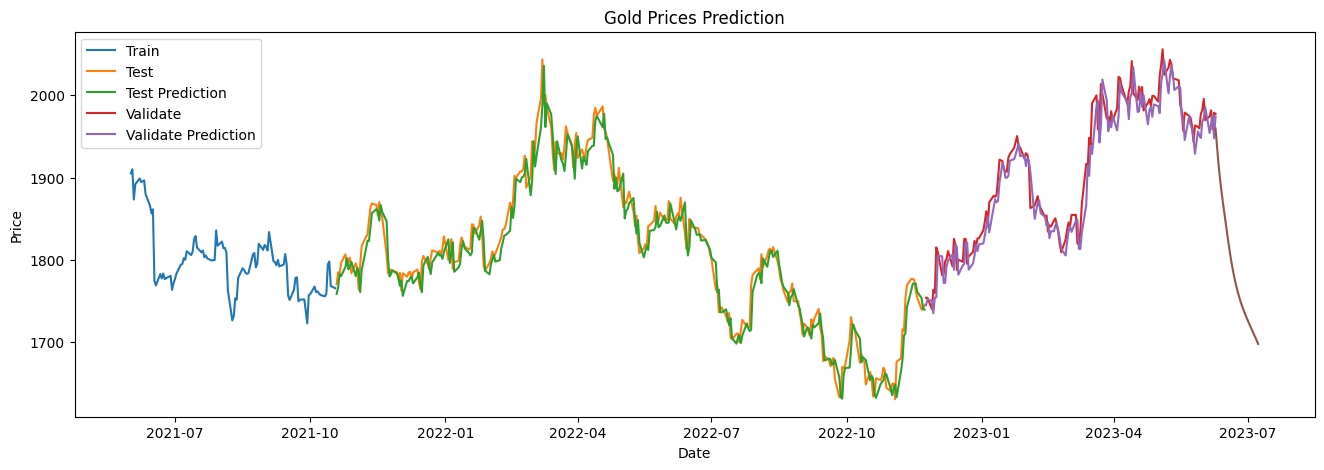

In [ ]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['price']).set_index(pd.Series(datelist_future))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a subplot
plt.figure(figsize=(16,5))

# Create a plot to compare the predicted and true values for the training and test data
plt.plot(train_data.index[train_size-100:], train_data.Price[train_size-100:])
plt.plot(test_data)

# Plot the actual and predicted prices in the test set, and the predicted future prices
plt.plot(test_data.index, y_test_predict)
plt.plot(val_data)
plt.plot(val_data.index, y_val_predict)

plt.plot(PREDICTIONS_FUTURE)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Prices Prediction')
plt.legend(['Train','Test','Test Prediction','Validate', 'Validate Prediction'])
plt.show()

In [ ]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  14.02538405198317
MAPE:  0.7716057188988612
RMSE:  18.153141703108837

** Validate **
MAE:  16.324457465277778
MAPE:  0.8504069053170464
RMSE:  20.772001092602952


# Split dataset (6-3-1)

---



In [ ]:
# 4. Split data (6-3-1)
train_size = int(0.6 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [ ]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [ ]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [ ]:
# Build the model
model = Sequential()

# Add an LSTM layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an LSTM layer with 50 units
model.add(LSTM(50,return_sequences=True))

# Add an LSTM layer with 50 units
model.add(LSTM(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_6_3_1.hdf5'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80

Epoch 1: loss improved from inf to 0.16053, saving model to save_model_6_3_1.hdf5
16/16 - 10s - loss: 0.1605 - 10s/epoch - 650ms/step
Epoch 2/80

Epoch 2: loss improved from 0.16053 to 0.05186, saving model to save_model_6_3_1.hdf5
16/16 - 3s - loss: 0.0519 - 3s/epoch - 161ms/step
Epoch 3/80

Epoch 3: loss improved from 0.05186 to 0.03952, saving model to save_model_6_3_1.hdf5
16/16 - 3s - loss: 0.0395 - 3s/epoch - 161ms/step
Epoch 4/80

Epoch 4: loss improved from 0.03952 to 0.03393, saving model to save_model_6_3_1.hdf5
16/16 - 3s - loss: 0.0339 - 3s/epoch - 160ms/step
Epoch 5/80

Epoch 5: loss did not improve from 0.03393
16/16 - 3s - loss: 0.0352 - 3s/epoch - 207ms/step
Epoch 6/80

Epoch 6: loss improved from 0.03393 to 0.03235, saving model to save_model_6_3_1.hdf5
16/16 - 4s - loss: 0.0323 - 4s/epoch - 236ms/step
Epoch 7/80

Epoch 7: loss improved from 0.03235 to 0.03026, saving model to save_model_6_3_1.hdf5
16/16 - 3s - loss: 0.0303 - 3s/epoch - 162ms/step
Epoch 8/8

In [ ]:
# Transform the y_train array back to the original scale
y_train = sc.inverse_transform(y_train)

# Load the best model from the save_model.hdf5 file
final_model = load_model('save_model_6_3_1.hdf5')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

24/24 [==============================] - 2s 40ms/step


In [ ]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

14/14 [==============================] - 1s 40ms/step


In [ ]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

5/5 [==============================] - 0s 38ms/step


In [ ]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.8573526089902868, 0.8654845267675624, 0.8511407273548675, 0.8500112943302458, 0.8345380618929297, 0.8419923198554327, 0.8400722837135755, 0.8270838039304267, 0.7667720804156315, 0.7704992093968825, 0.7767110910323018, 0.7831488592726452, 0.7704992093968825, 0.766659137113169, 0.7543483171447933, 0.7567201264964987, 0.7343573526089902, 0.7431669302010389, 0.7413598373616446, 0.7496611700926135, 0.7527671109103231, 0.7437316467133499, 0.7333408628868305, 0.7169640840298168, 0.7061215269934493, 0.7238536254800092, 0.7371809351705445, 0.7470070024847528, 0.7414727806641066, 0.7573977863112713, 0.7573977863112713, 0.718319403659363, 0.7167381974248923, 0.7348091258188387, 0.7716286424215042, 0.8273096905353512, 0.8209848655974699, 0.862999774113395, 0.8535125367065732, 0.910548904449966, 0.9212785181838714, 0.8745199909645356, 0.8838942850688953, 0.936638807318726, 0.9235373842331147, 0.8894285068895411, 0.8916873729387844, 0.8842331149762819, 0.8993675175062119, 0.8866049243279

In [ ]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.9011474251747131], [0.9027881026268005], [0.9014936685562134], [0.8994522094726562], [0.8980406522750854], [0.8976032733917236], [0.8978148698806763], [0.8981744050979614], [0.8983344435691833], [0.8981953263282776], [0.8978388905525208], [0.8974089026451111], [0.8970201015472412], [0.8967220783233643], [0.8965095281600952], [0.8963520526885986], [0.8962203860282898], [0.8960987329483032], [0.8959851861000061], [0.8958854079246521], [0.895805299282074], [0.8957469463348389], [0.895708441734314], [0.8956854939460754], [0.8956735134124756], [0.8956677913665771], [0.8956660032272339], [0.8956664800643921], [0.8956683874130249], [0.8956707119941711]]


In [ ]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[1981.87593025]
 [1983.32858607]
 [1982.18249414]
 [1980.37498627]
 [1979.12519352]
 [1978.73793826]
 [1978.92528579]
 [1979.24361827]
 [1979.38531634]
 [1979.26214193]
 [1978.9465537 ]
 [1978.5658424 ]
 [1978.22159791]
 [1977.95772815]
 [1977.76953623]
 [1977.63010745]
 [1977.51352979]
 [1977.40581815]
 [1977.30528377]
 [1977.21694018]
 [1977.14601198]
 [1977.09434628]
 [1977.06025431]
 [1977.03993634]
 [1977.02932878]
 [1977.02426248]
 [1977.02267926]
 [1977.02310145]
 [1977.02479022]
 [1977.0268484 ]]


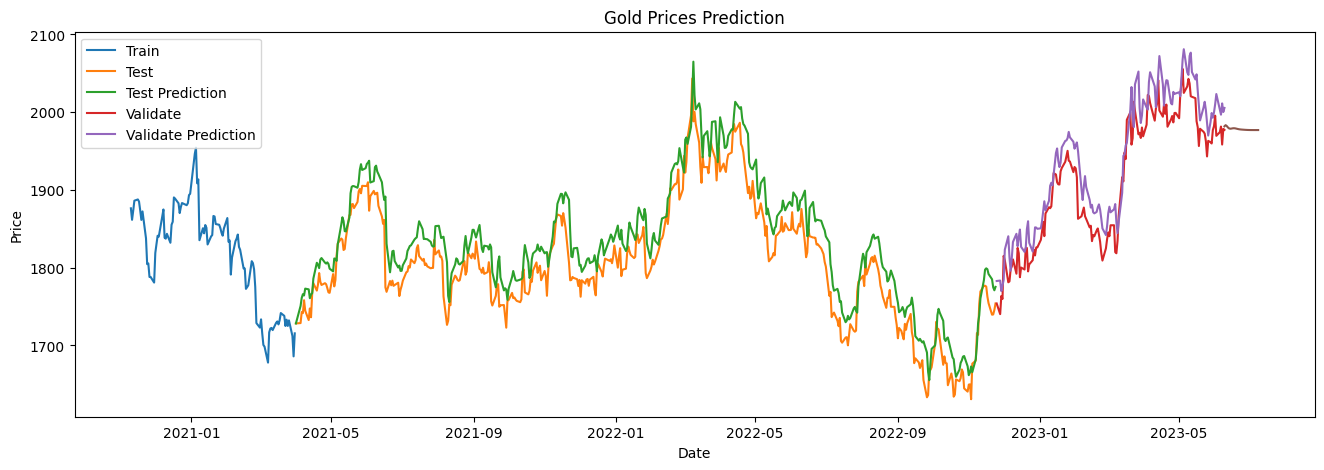

In [ ]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['price']).set_index(pd.Series(datelist_future))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a subplot
plt.figure(figsize=(16,5))

# Create a plot to compare the predicted and true values for the training and test data
plt.plot(train_data.index[train_size-100:], train_data.Price[train_size-100:])
plt.plot(test_data)

# Plot the actual and predicted prices in the test set, and the predicted future prices
plt.plot(test_data.index, y_test_predict)
plt.plot(val_data)
plt.plot(val_data.index, y_val_predict)

plt.plot(PREDICTIONS_FUTURE)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Prices Prediction')
plt.legend(['Train','Test','Test Prediction','Validate', 'Validate Prediction'])
plt.show()

In [ ]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  28.943243621612762
MAPE:  1.60879991728906
RMSE:  33.21478320265609

** Validate **
MAE:  28.563954941542836
MAPE:  1.4970130968593536
RMSE:  33.392109101752595


# Split dataset (5-3-2)

---



In [ ]:
# Split data
train_size = int(0.5 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [ ]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [ ]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [ ]:
# Build the model
model = Sequential()

# Add an LSTM layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an LSTM layer with 50 units
model.add(LSTM(50,return_sequences=True))

# Add an LSTM layer with 50 units
model.add(LSTM(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_5_3_2.hdf5'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80

Epoch 1: loss improved from inf to 0.15534, saving model to save_model_5_3_2.hdf5
13/13 - 9s - loss: 0.1553 - 9s/epoch - 683ms/step
Epoch 2/80

Epoch 2: loss improved from 0.15534 to 0.06532, saving model to save_model_5_3_2.hdf5
13/13 - 2s - loss: 0.0653 - 2s/epoch - 164ms/step
Epoch 3/80

Epoch 3: loss improved from 0.06532 to 0.03431, saving model to save_model_5_3_2.hdf5
13/13 - 2s - loss: 0.0343 - 2s/epoch - 165ms/step
Epoch 4/80

Epoch 4: loss improved from 0.03431 to 0.02973, saving model to save_model_5_3_2.hdf5
13/13 - 2s - loss: 0.0297 - 2s/epoch - 169ms/step
Epoch 5/80

Epoch 5: loss improved from 0.02973 to 0.02832, saving model to save_model_5_3_2.hdf5
13/13 - 4s - loss: 0.0283 - 4s/epoch - 283ms/step
Epoch 6/80

Epoch 6: loss improved from 0.02832 to 0.02830, saving model to save_model_5_3_2.hdf5
13/13 - 2s - loss: 0.0283 - 2s/epoch - 187ms/step
Epoch 7/80

Epoch 7: loss did not improve from 0.02830
13/13 - 2s - loss: 0.0294 - 2s/epoch - 160ms/step
Epoch 8/80


In [ ]:
# Transform the y_train array back to the original scale
y_train = sc.inverse_transform(y_train)

# Load the best model from the save_model.hdf5 file
final_model = load_model('save_model_5_3_2.hdf5')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

20/20 [==============================] - 2s 42ms/step


In [ ]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

14/14 [==============================] - 1s 40ms/step


In [ ]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

9/9 [==============================] - 0s 42ms/step


In [ ]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.8573526089902868, 0.8654845267675624, 0.8511407273548675, 0.8500112943302458, 0.8345380618929297, 0.8419923198554327, 0.8400722837135755, 0.8270838039304267, 0.7667720804156315, 0.7704992093968825, 0.7767110910323018, 0.7831488592726452, 0.7704992093968825, 0.766659137113169, 0.7543483171447933, 0.7567201264964987, 0.7343573526089902, 0.7431669302010389, 0.7413598373616446, 0.7496611700926135, 0.7527671109103231, 0.7437316467133499, 0.7333408628868305, 0.7169640840298168, 0.7061215269934493, 0.7238536254800092, 0.7371809351705445, 0.7470070024847528, 0.7414727806641066, 0.7573977863112713, 0.7573977863112713, 0.718319403659363, 0.7167381974248923, 0.7348091258188387, 0.7716286424215042, 0.8273096905353512, 0.8209848655974699, 0.862999774113395, 0.8535125367065732, 0.910548904449966, 0.9212785181838714, 0.8745199909645356, 0.8838942850688953, 0.936638807318726, 0.9235373842331147, 0.8894285068895411, 0.8916873729387844, 0.8842331149762819, 0.8993675175062119, 0.8866049243279

In [ ]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.8960436582565308], [0.8926479816436768], [0.8866974115371704], [0.8793761730194092], [0.8719807267189026], [0.865385890007019], [0.859879732131958], [0.8552537560462952], [0.8510541319847107], [0.8468506932258606], [0.842420756816864], [0.837801456451416], [0.8332300186157227], [0.8290202021598816], [0.825438380241394], [0.8226221203804016], [0.820559561252594], [0.8191227316856384], [0.8181296586990356], [0.8174046874046326], [0.8168208599090576], [0.8163108825683594], [0.8158559203147888], [0.8154588341712952], [0.8151182532310486], [0.8148110508918762], [0.8144887685775757], [0.8140861988067627], [0.8135362267494202], [0.8127845525741577]]


In [ ]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[1977.35705502]
 [1974.35052295]
 [1969.08188818]
 [1962.59966359]
 [1956.05173544]
 [1950.21266701]
 [1945.33751483]
 [1941.2416756 ]
 [1937.52332846]
 [1933.80160378]
 [1929.87933809]
 [1925.78940954]
 [1921.74185848]
 [1918.01448699]
 [1914.84314187]
 [1912.34962538]
 [1910.52343553]
 [1909.25126663]
 [1908.37199981]
 [1907.73011023]
 [1907.21318936]
 [1906.76165543]
 [1906.35883185]
 [1906.00725178]
 [1905.70570141]
 [1905.43370446]
 [1905.1483557 ]
 [1904.79192042]
 [1904.30497516]
 [1903.63944285]]


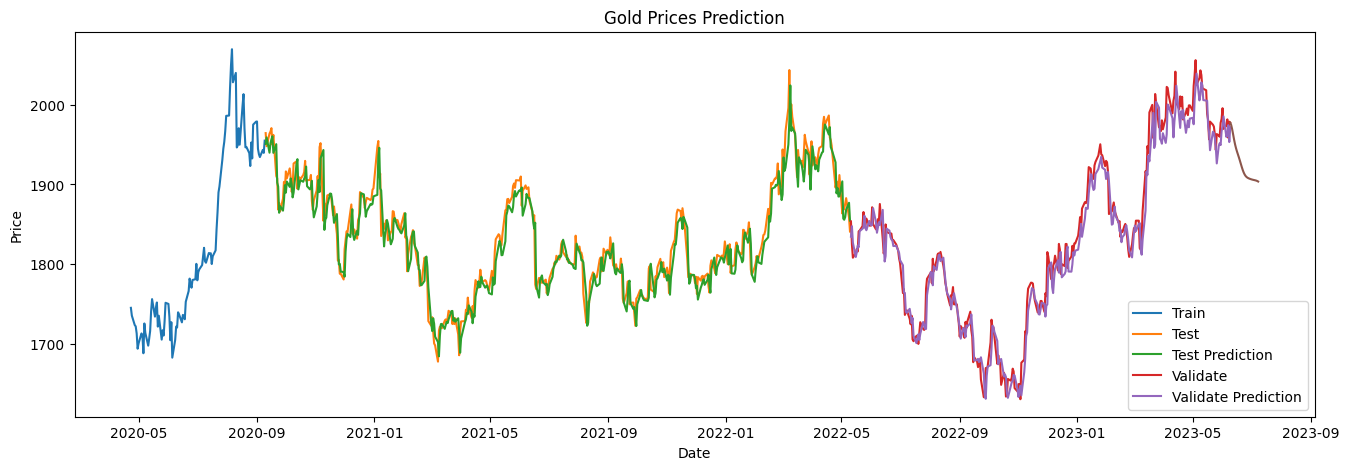

In [ ]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['price']).set_index(pd.Series(datelist_future))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a subplot
plt.figure(figsize=(16,5))

# Create a plot to compare the predicted and true values for the training and test data
plt.plot(train_data.index[train_size-100:], train_data.Price[train_size-100:])
plt.plot(test_data)

# Plot the actual and predicted prices in the test set, and the predicted future prices
plt.plot(test_data.index, y_test_predict)
plt.plot(val_data)
plt.plot(val_data.index, y_val_predict)

plt.plot(PREDICTIONS_FUTURE)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Prices Prediction')
plt.legend(['Train','Test','Test Prediction','Validate', 'Validate Prediction'])
plt.show()

In [ ]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  14.623886798422937
MAPE:  0.7926820250838333
RMSE:  19.41475294688843

** Validate **
MAE:  15.073758980277534
MAPE:  0.8150621796917938
RMSE:  19.672940581261823


# Evaluating model

---

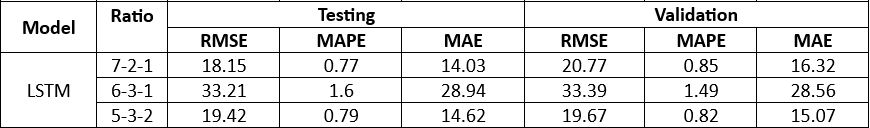